In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Github/xAI-project-computer-vision

import sys
sys.path.insert(0,'/content/drive/My Drive/Github/xAI-project-computer-vision')

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1Rc4yOY9-4nyo4PuPOLW54tnaNHAfWufd/Github/xAI-project-computer-vision


In [3]:
!pip install torchinfo

In [2]:
import numpy as np
import random
import multiprocessing

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
#from torchinfo import summary

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0+cu118
torchvision version: 0.16.0+cu118


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [6]:
def seed_all(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    print(f'Random seed {seed} has been set.')

seed_all(42)

Random seed 42 has been set.


In [7]:
# Hyperparameters

num_classes = 10

# number of samples per batch to load
batch_size = 64

# number of subprocesses to use for data loading
num_workers = multiprocessing.cpu_count() if not torch.cuda.is_available() else 2
print(f'Number of workers: {num_workers}')

epochs = 10
lr = 0.001

Number of workers: 2


In [8]:
import torch.nn as nn
import torch.optim as optim

import models
from utils import print_model_summary, get_available_device, move_to_device

Device: cuda



# Train initial (unoptimized) models

## Train own CNN

### Train simple custom CNN

#### Train simple custom CNN v1

In [ ]:
# Specify model
model = models.get_model('simple_convnet', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
SimpleConvNet (SimpleConvNet)            [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 16, 32, 32]     448                  True
├─MaxPool2d (pool)                       [64, 16, 32, 32]     [64, 16, 16, 16]     --                   --
├─Conv2d (conv2)                         [64, 16, 16, 16]     [64, 32, 16, 16]     4,640                True
├─MaxPool2d (pool)                       [64, 32, 16, 16]     [64, 32, 8, 8]       --                   --
├─Conv2d (conv3)                         [64, 32, 8, 8]       [64, 64, 8, 8]       18,496               True
├─MaxPool2d (pool)                       [64, 64, 8, 8]       [64, 64, 4, 4]       --                   --
├─Dropout (dropout)                      [64, 1024]           [64, 1024]           --                   --
├─Linear (fc1)        

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

Random seed 42 has been set.
Number of train samplers: 40000
Number of validation samplers: 10000
Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Epoch: 001/010 | Batch 000/625 | Loss: 2.3070
Epoch: 001/010 | Batch 120/625 | Loss: 1.6297
Epoch: 001/010 | Batch 240/625 | Loss: 1.4694
Epoch: 001/010 | Batch 360/625 | Loss: 1.5213
Epoch: 001/010 | Batch 480/625 | Loss: 1.6470
Epoch: 001/010 | Batch 600/625 | Loss: 1.4187
Epoch: 001/010   Train Loss: 1.54 | Train Acc.: 0.44% | Validation Loss: 1.28 | Validation Acc.: 0.54%
Validation loss decreased (inf --> 1.277007).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/010 | Batch 000/625 | Loss: 1.3878
Epoch: 002/010 | Batch 120/625

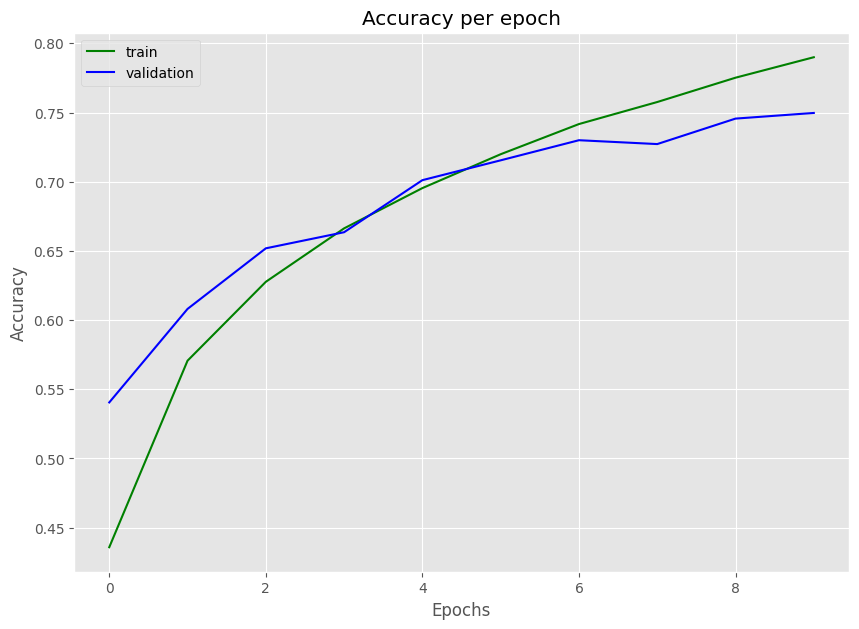

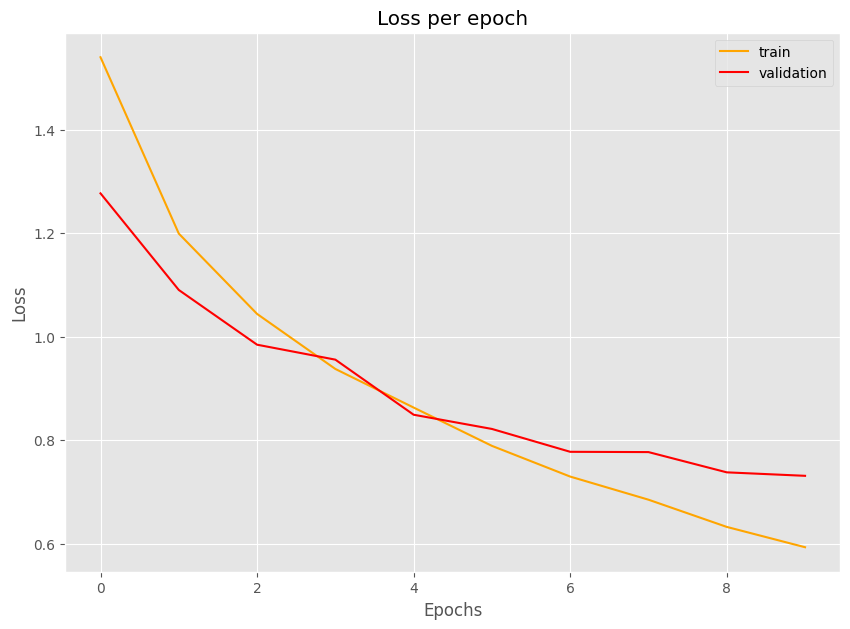

TRAINING FINISHED
CPU times: user 49.7 s, sys: 7.68 s, total: 57.4 s
Wall time: 3min 2s


In [ ]:
%%time
from train import train

results = train(num_classes=num_classes, model=model, model_name='simple_convnet', batch_size=batch_size, num_workers=num_workers, epochs=epochs, max_lr=lr, loss_func=loss_func, optimizer=optimizer)


In [ ]:
!python test.py --num_classes 10 --cp_datetime '20231207_091032' --model_name 'simple_convnet' --loss_func_name 'cross_entropy' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

10
Random seed 42 has been set.
Device: cuda

Number of train samplers: 40000
Number of validation samplers: 10000
Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Last model was saved at 10 epochs

Best model was saved at 10 epochs

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
SimpleConvNet (SimpleConvNet)            [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 16, 32, 32]     448                  True
├─MaxPool2d (pool)                       [64, 16, 32, 32]     [64, 16, 16, 16]     --                   --
├─Conv2d (conv2)                         [64, 16, 16, 1

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Epoch: 001/010 | Batch 000/625 | Loss: 2.3070
Epoch: 001/010 | Batch 120/625 | Loss: 1.6297
Epoch: 001/010 | Batch 240/625 | Loss: 1.4694
Epoch: 001/010 | Batch 360/625 | Loss: 1.5213
Epoch: 001/010 | Batch 480/625 | Loss: 1.6470
Epoch: 001/010 | Batch 600/625 | Loss: 1.4187
Epoch: 001/010   Train Loss: 1.54 | Train Acc.: 0.44% | Validation Loss: 1.28 | Validation Acc.: 0.54%
Validation loss decreased (inf --> 1.277007).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/010 | Batch 000/625 | Loss: 1.3878
Epoch: 002/010 | Batch 120/625 | Loss: 1.3874
Epoch: 002/010 | Batch 240/625 | Loss: 1.2374
Epoch: 002/010 | Batch 360/625 | Los

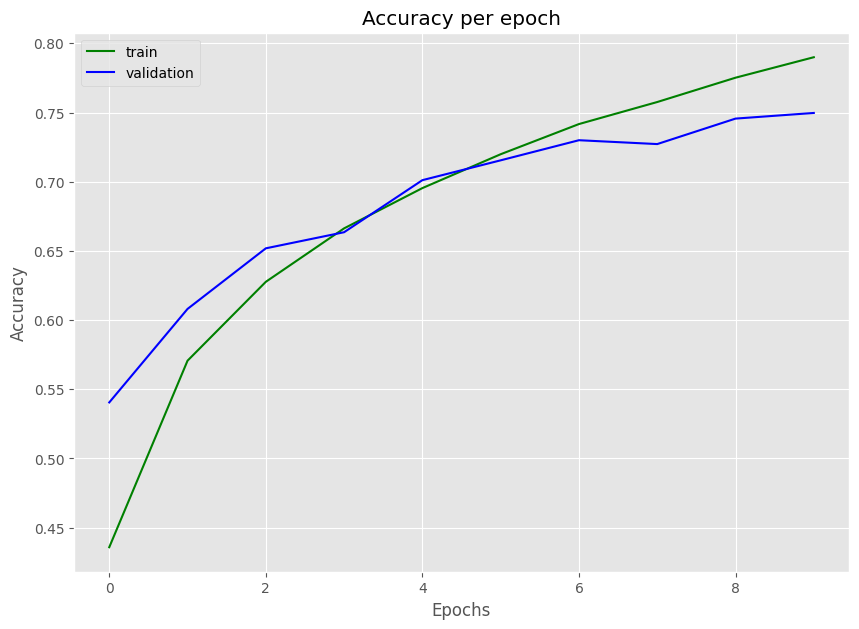

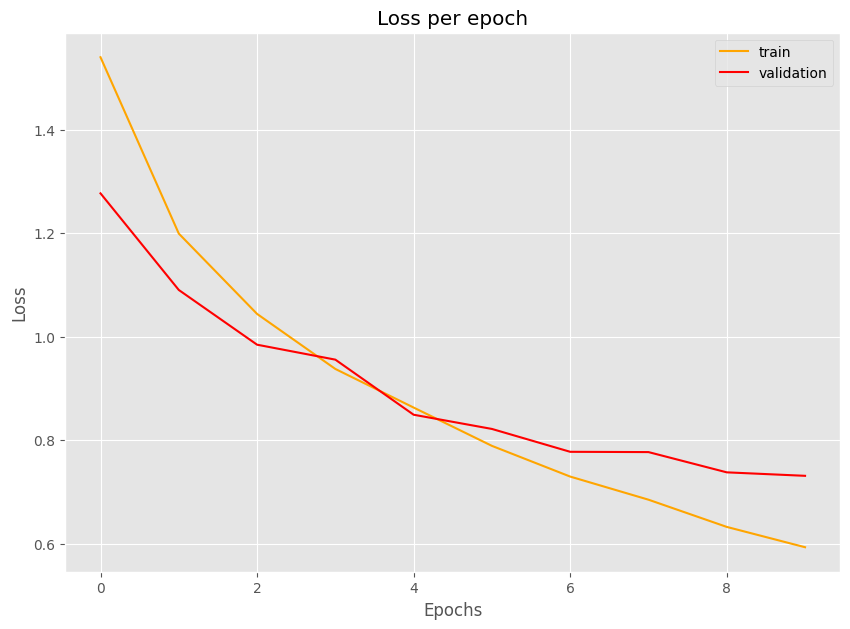

TRAINING FINISHED
CPU times: user 48.2 s, sys: 8.09 s, total: 56.3 s
Wall time: 3min 5s


In [ ]:
# Old run
%%time
from train import train

results = train(num_classes=num_classes, model=model, model_name='simple_convnet', batch_size=batch_size, num_workers=num_workers, epochs=epochs, max_lr=lr, loss_func=loss_func, optimizer=optimizer)


In [ ]:
# Old run
!python test.py --num_classes 10 --model_name 'simple_convnet' --loss_func_name 'cross_entropy' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

Random seed 42 has been set.
Device: cuda

Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Best model was saved at 10 epochs

Last model was saved at 10 epochs

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
SimpleConvNet (SimpleConvNet)            [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 16, 32, 32]     448                  True
├─MaxPool2d (pool)                       [64, 16, 32, 32]     [64, 16, 16, 16]     --                   --
├─Conv2d (conv2)                         [64, 16, 16, 16]     [64, 32, 16, 16]     4,640                True
├─MaxPool2d (pool)                       [64, 3

#### Train simple custom CNN v2

In [12]:
# Specify model
model = models.get_model('simple_convnet_v2', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
SimpleConvNetV2 (SimpleConvNetV2)        [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 48, 32, 32]     1,344                True
├─Conv2d (conv2)                         [64, 48, 32, 32]     [64, 96, 32, 32]     41,568               True
├─MaxPool2d (pool)                       [64, 96, 32, 32]     [64, 96, 16, 16]     --                   --
├─Dropout (dropout)                      [64, 96, 16, 16]     [64, 96, 16, 16]     --                   --
├─Conv2d (conv3)                         [64, 96, 16, 16]     [64, 192, 16, 16]    166,080              True
├─Conv2d (conv4)                         [64, 192, 16, 16]    [64, 256, 16, 16]    442,624              True
├─MaxPool2d (pool)                       [64, 256, 16, 16]    [64, 256, 8, 8]      --                   --
├─Dropout (dropout) 

Random seed 42 has been set.
Number of train samplers: 40000
Number of validation samplers: 10000
Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Epoch: 001/010 | Batch 000/625 | Loss: 2.3025
Epoch: 001/010 | Batch 120/625 | Loss: 1.7141
Epoch: 001/010 | Batch 240/625 | Loss: 1.4934
Epoch: 001/010 | Batch 360/625 | Loss: 1.5548
Epoch: 001/010 | Batch 480/625 | Loss: 1.4313
Epoch: 001/010 | Batch 600/625 | Loss: 1.2403
Epoch: 001/010   Train Loss: 1.56 | Train Acc.: 0.43% | Validation Loss: 1.18 | Validation Acc.: 0.58%
--------------------------------------------------
Epoch: 002/010 | Batch 000/625 | Loss: 1.2983
Epoch: 002/010 | Batch 120/625 | Loss: 1.2088
Epoch: 002/010 | Batch 240/625 | Loss: 1.1331
Epoch: 002/010 | Batch 360/625 | Loss: 0.9591
Epoch: 002/010 | Batch 480/625 | Loss: 0.9337
Epoch: 002/010 | Batch 600/625 | Loss: 1.1005
Epoch: 002/010   Train Loss: 1.07 | Train Acc.: 0.62% | Validation Los

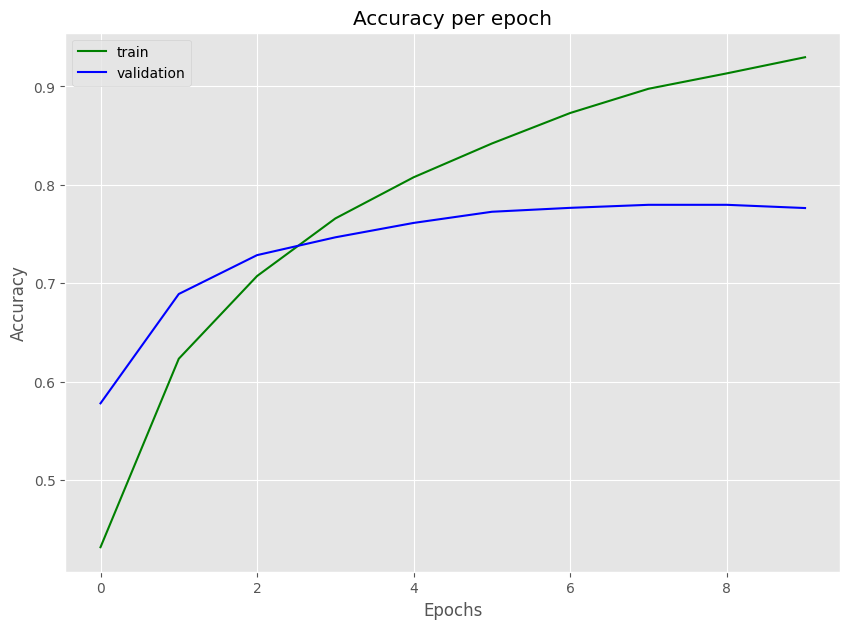

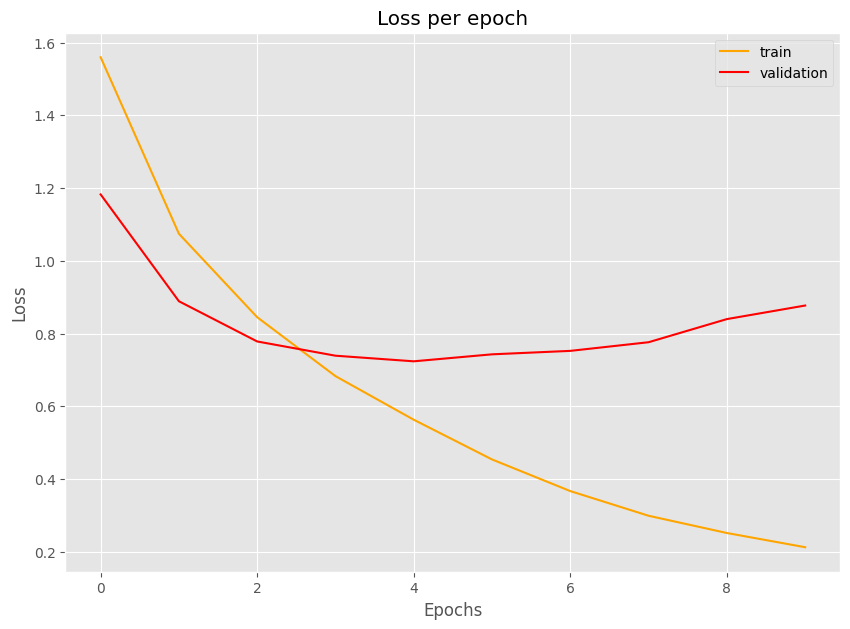

TRAINING FINISHED
CPU times: user 1min 43s, sys: 6.99 s, total: 1min 50s
Wall time: 3min 27s


In [13]:
%%time
from train import train

results = train(num_classes=num_classes, model=model, model_name='simple_convnet_v2', batch_size=batch_size, num_workers=num_workers, epochs=epochs, max_lr=lr, loss_func=loss_func, optimizer=optimizer)


In [14]:
!python test.py --num_classes 10 --cp_datetime '20231207_102218' --model_name 'simple_convnet_v2' --loss_func_name 'cross_entropy' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

10
Random seed 42 has been set.
Device: cuda

Number of train samplers: 40000
Number of validation samplers: 10000
Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Last model was saved at 10 epochs

Best model was saved at 5 epochs

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
SimpleConvNetV2 (SimpleConvNetV2)        [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 48, 32, 32]     1,344                True
├─Conv2d (conv2)                         [64, 48, 32, 32]     [64, 96, 32, 32]     41,568               True
├─MaxPool2d (pool)                       [64, 96, 32, 

### Train deeper custom CNN (based on ResNet50)

#### Train simplified custom ResNet

In [9]:
# Specify model
model = models.get_model('resnet_custom_simplified', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResnetCustomSimplified (ResnetCustomSimplified)    [64, 3, 32, 32]      [64, 10]             --                   True
├─Sequential (conv_layer_1)                        [64, 3, 32, 32]      [64, 64, 32, 32]     --                   True
│    └─Conv2d (0)                                  [64, 3, 32, 32]      [64, 64, 32, 32]     1,792                True
│    └─BatchNorm2d (1)                             [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    └─ReLU (2)                                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   --
├─Sequential (conv_layer_2)                        [64, 64, 32, 32]     [64, 128, 16, 16]    --                   True
│    └─Conv2d (0)                                  [64, 64, 32, 32]     [64, 128, 32, 32]    73,856               True
│    └─BatchNorm2d (1)                       

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

Random seed 42 has been set.
Number of train samplers: 40000
Number of validation samplers: 10000
Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Epoch: 001/010 | Batch 000/625 | Loss: 2.7142
Epoch: 001/010 | Batch 120/625 | Loss: 1.4347
Epoch: 001/010 | Batch 240/625 | Loss: 1.8410
Epoch: 001/010 | Batch 360/625 | Loss: 1.4624
Epoch: 001/010 | Batch 480/625 | Loss: 1.2649
Epoch: 001/010 | Batch 600/625 | Loss: 0.7934
Epoch: 001/010   Train Loss: 1.40 | Train Acc.: 0.52% | Validation Loss: 0.92 | Validation Acc.: 0.67%
Validation loss decreased (inf --> 0.922323).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/010 | Batch 000/625 | Loss: 1.0477
Epoch: 002/010 | Batch 120/625

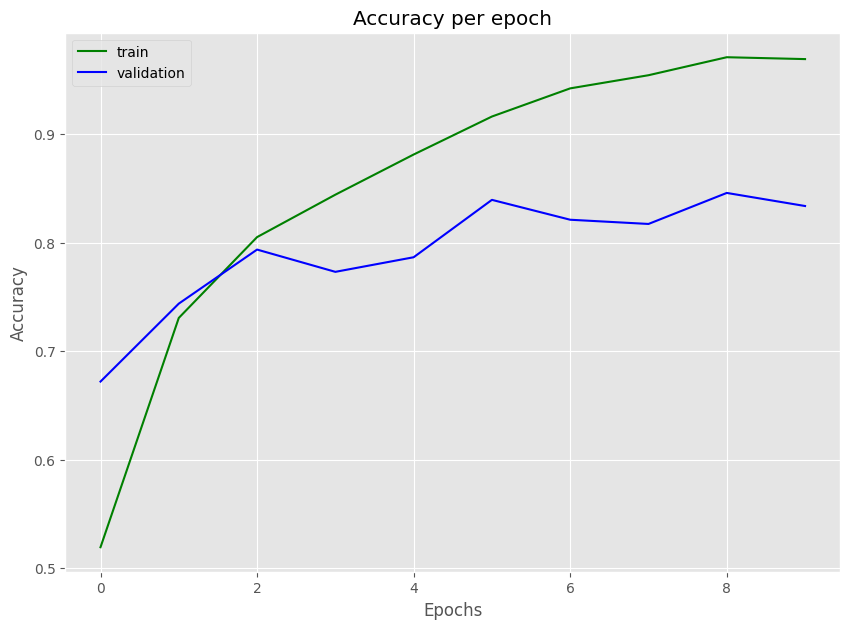

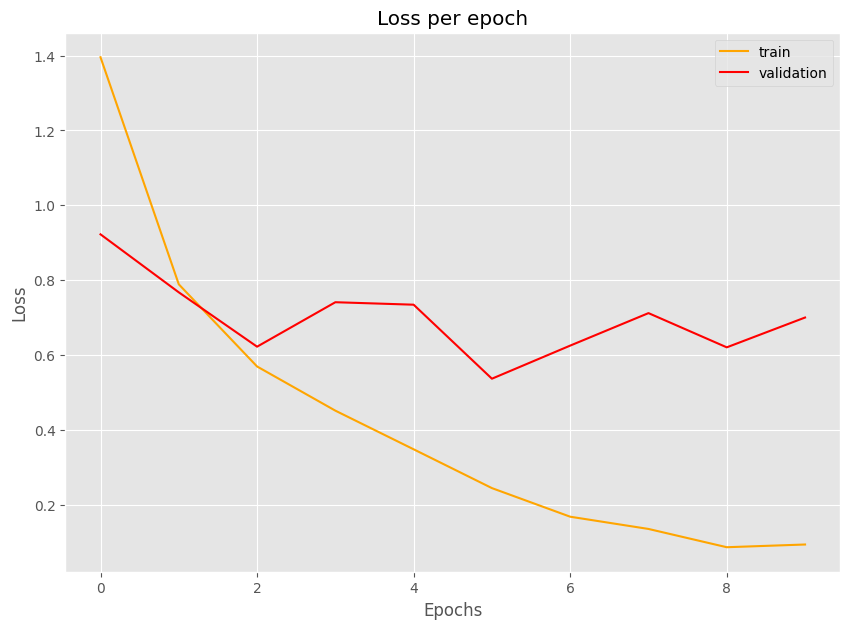

TRAINING FINISHED
CPU times: user 3min 4s, sys: 7.91 s, total: 3min 12s
Wall time: 4min 30s


In [10]:
%%time
from train import train

results = train(num_classes=num_classes, model=model, model_name='resnet_custom_simplified', batch_size=batch_size, num_workers=num_workers, epochs=epochs, max_lr=lr, loss_func=loss_func, optimizer=optimizer)


In [11]:
!python test.py --num_classes 10 --cp_datetime '20231207_105441' --model_name 'resnet_custom_simplified' --loss_func_name 'cross_entropy' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

10
Random seed 42 has been set.
Device: cuda

Number of train samplers: 40000
Number of validation samplers: 10000
Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Last model was saved at 10 epochs

Best model was saved at 6 epochs

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResnetCustomSimplified (ResnetCustomSimplified)    [64, 3, 32, 32]      [64, 10]             --                   True
├─Sequential (conv_layer_1)                        [64, 3, 32, 32]      [64, 64, 32, 32]     --                   True
│    └─Conv2d (0)                                  [64, 3, 32, 32]      [64, 64, 32, 32]     1,792                True
│    └─BatchNo

#### Train custom ResNet50

In [ ]:
# Specify model
model = models.get_model('resnet50_custom', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 256, 32, 32]    --                   True
│    └─Bottleneck (0)                    [64, 64, 32, 32]     [64, 256, 32, 32]    --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32, 32]     4,096                True
│    │    └─BatchNorm2d (bn1)            [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    │    └─Conv2d (conv2)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─Ba

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

Random seed 42 has been set.
Number of train samplers: 40000
Number of validation samplers: 10000
Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Epoch: 001/010 | Batch 000/625 | Loss: 2.4404
Epoch: 001/010 | Batch 120/625 | Loss: 1.7253
Epoch: 001/010 | Batch 240/625 | Loss: 1.7359
Epoch: 001/010 | Batch 360/625 | Loss: 1.6683
Epoch: 001/010 | Batch 480/625 | Loss: 1.4307
Epoch: 001/010 | Batch 600/625 | Loss: 1.3574
Epoch: 001/010   Train Loss: 1.57 | Train Acc.: 0.44% | Validation Loss: 1.76 | Validation Acc.: 0.56%
Validation loss decreased (inf --> 1.757560).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/010 | Batch 000/625 | Loss: 1.3324
Epoch: 002/010 | Batch 120/625

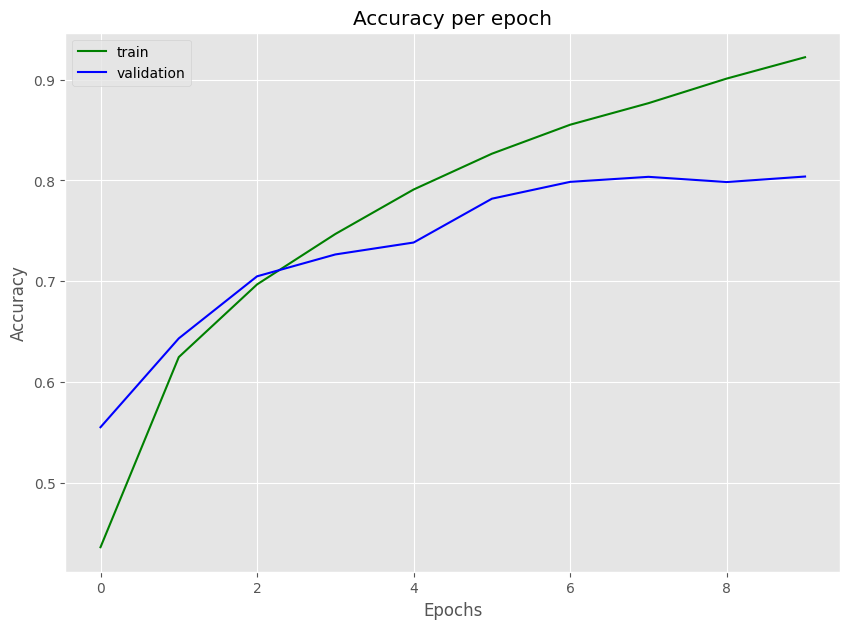

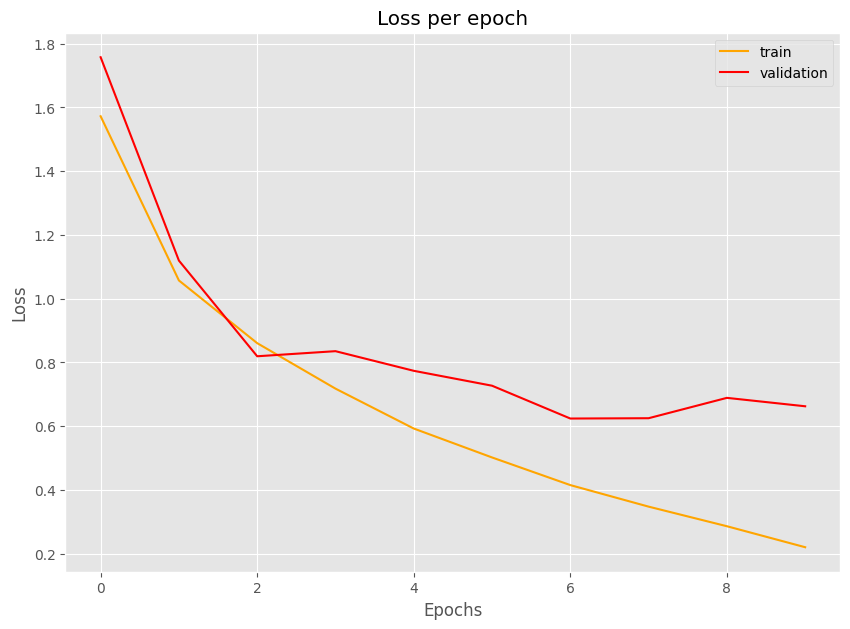

TRAINING FINISHED
CPU times: user 24min 28s, sys: 15.1 s, total: 24min 43s
Wall time: 27min 2s


In [ ]:
%%time
from train import train

results = train(num_classes=num_classes, model=model, model_name='resnet50_custom', batch_size=batch_size, num_workers=num_workers, epochs=epochs, max_lr=lr, loss_func=loss_func, optimizer=optimizer)


In [ ]:
!python test.py --num_classes 10 --cp_datetime '20231207_093202' --model_name 'resnet50_custom' --loss_func_name 'cross_entropy' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

10
Random seed 42 has been set.
Device: cuda

Number of train samplers: 40000
Number of validation samplers: 10000
Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Last model was saved at 10 epochs

Best model was saved at 7 epochs

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Epoch: 001/010 | Batch 000/625 | Loss: 2.4404
Epoch: 001/010 | Batch 120/625 | Loss: 1.7253
Epoch: 001/010 | Batch 240/625 | Loss: 1.7359
Epoch: 001/010 | Batch 360/625 | Loss: 1.6683
Epoch: 001/010 | Batch 480/625 | Loss: 1.4307
Epoch: 001/010 | Batch 600/625 | Loss: 1.3574
Epoch: 001/010   Train Loss: 1.57 | Train Acc.: 0.44% | Validation Loss: 1.76 | Validation Acc.: 0.56%
Validation loss decreased (inf --> 1.757560).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/010 | Batch 000/625 | Loss: 1.3324
Epoch: 002/010 | Batch 120/625 | Loss: 1.4082
Epoch: 002/010 | Batch 240/625 | Loss: 1.2339
Epoch: 002/010 | Batch 360/625 | Los

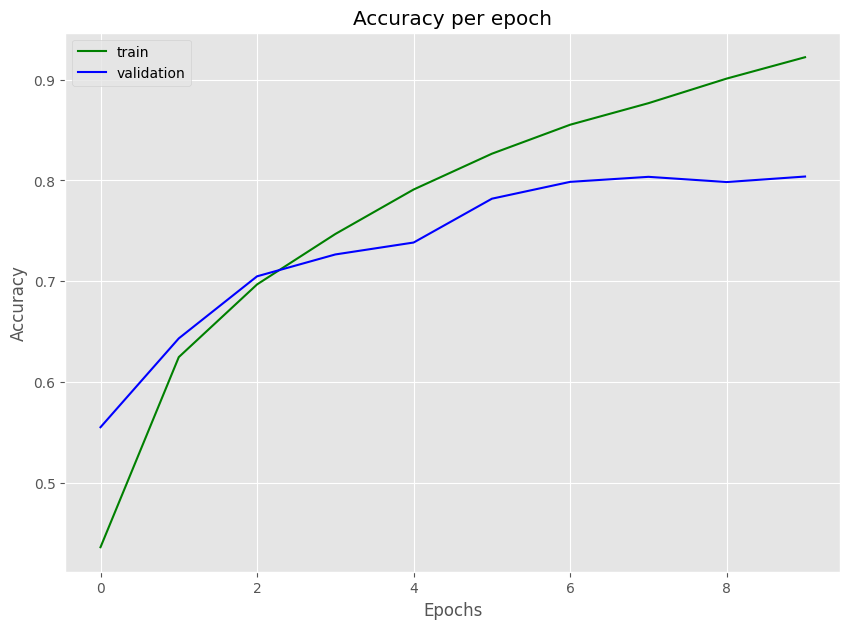

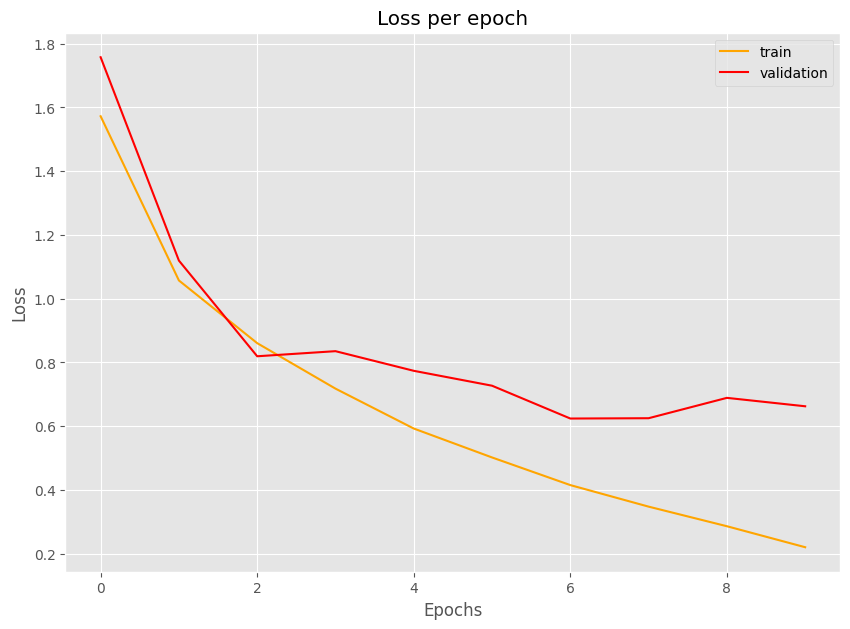

TRAINING FINISHED
CPU times: user 23min 35s, sys: 16.5 s, total: 23min 51s
Wall time: 25min 33s


In [ ]:
# Old run
%%time
from train import train

results = train(num_classes=num_classes, model=model, model_name='resnet50_custom', batch_size=batch_size, num_workers=num_workers, epochs=epochs, max_lr=lr, loss_func=loss_func, optimizer=optimizer)


In [ ]:
# Old run
!python test.py --num_classes 10 --cp-datetime '' --model_name 'resnet50_custom' --loss_func_name 'cross_entropy' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

Random seed 42 has been set.
Device: cuda

Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Best model was saved at 7 epochs

Last model was saved at 10 epochs

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 256, 32, 32]    --                   True
│    └─Bottleneck (0)                    [64, 

## Fine-tune pre-trained ResNet50 (without pre-trained weights)

In [9]:
%%time
# Specify model
model = models.get_model('resnet50_fine_tuned', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 16, 16]     9,408                True
├─BatchNorm2d (bn1)                      [64, 64, 16, 16]     [64, 64, 16, 16]     128                  True
├─ReLU (relu)                            [64, 64, 16, 16]     [64, 64, 16, 16]     --                   --
├─MaxPool2d (maxpool)                    [64, 64, 16, 16]     [64, 64, 8, 8]       --                   --
├─Sequential (layer1)                    [64, 64, 8, 8]       [64, 256, 8, 8]      --                   True
│    └─Bottleneck (0)                    [64, 64, 8, 8]       [64, 256, 8, 8]      --                   True
│    │    └─Conv2d (conv1)               [64, 64, 8, 8]       [64, 64, 8, 8]       4,096                True
│    │    └─BatchN

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

Random seed 42 has been set.
Number of train samplers: 40000
Number of validation samplers: 10000
Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Epoch: 001/010 | Batch 000/625 | Loss: 2.5430
Epoch: 001/010 | Batch 120/625 | Loss: 1.8673
Epoch: 001/010 | Batch 240/625 | Loss: 2.0853
Epoch: 001/010 | Batch 360/625 | Loss: 2.4103
Epoch: 001/010 | Batch 480/625 | Loss: 1.7814
Epoch: 001/010 | Batch 600/625 | Loss: 1.7127
Epoch: 001/010   Train Loss: 1.94 | Train Acc.: 0.36% | Validation Loss: 2.07 | Validation Acc.: 0.46%
Validation loss decreased (inf --> 2.065435).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/010 | Batch 000/625 | Loss: 1.3427
Epoch: 002/010 | Batch 120/625

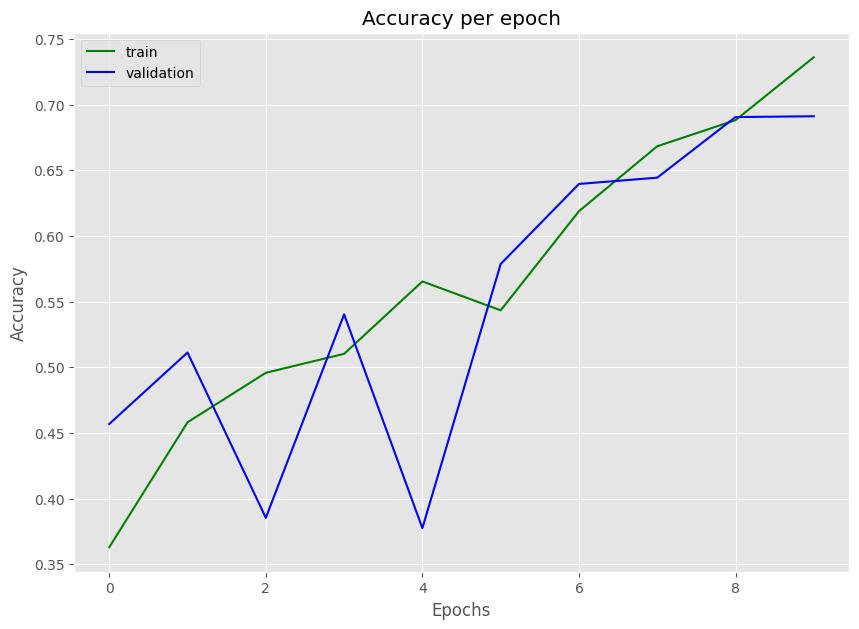

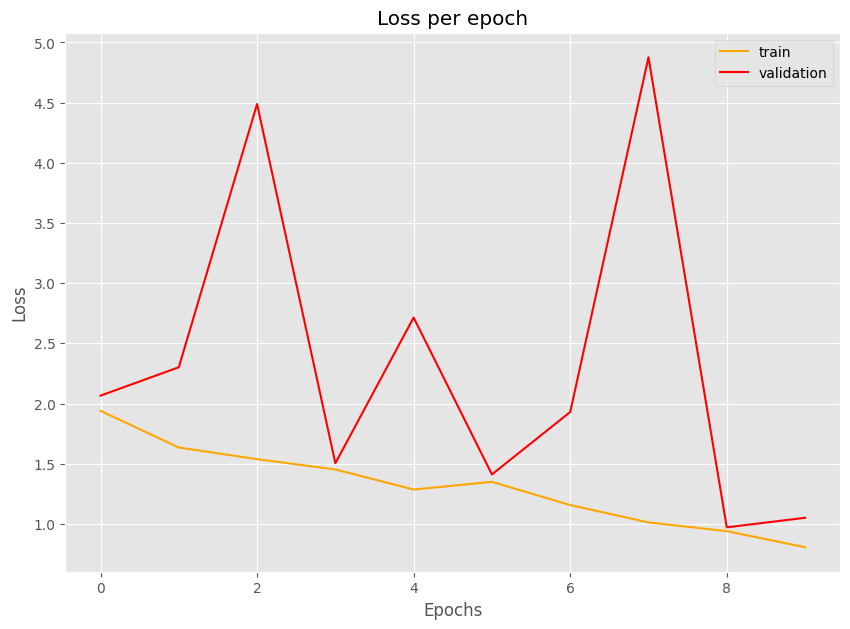

TRAINING FINISHED
CPU times: user 6min 1s, sys: 11.3 s, total: 6min 13s
Wall time: 7min 48s


In [10]:
%%time
# Results when using resnet50 without pretrained weights
from train import train

results = train(num_classes=num_classes, model=model, model_name='resnet50_fine_tuned', batch_size=batch_size, num_workers=num_workers, epochs=epochs, max_lr=lr, loss_func=loss_func, optimizer=optimizer)


In [11]:
!python test.py --num_classes 10 --cp_datetime '20231207_100958' --model_name 'resnet50_fine_tuned' --loss_func_name 'cross_entropy' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

10
Random seed 42 has been set.
Device: cuda

Number of train samplers: 40000
Number of validation samplers: 10000
Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Last model was saved at 10 epochs

Best model was saved at 9 epochs

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 16, 16]     9,408                True
├─BatchNorm2d (bn1)                      [64, 64, 16, 16]     [64, 64, 16, 16]     128                  True
├─ReLU (relu)                            [64, 64, 16, 

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Device: cuda

Random seed 42 has been set.
Number of training images: 50000
Number of validation images: 50000
Number of test images: 10000
Epoch: 001/010 | Batch 000/625 | Loss: 2.3888
Epoch: 001/010 | Batch 120/625 | Loss: 0.7997
Epoch: 001/010 | Batch 240/625 | Loss: 0.8401
Epoch: 001/010 | Batch 360/625 | Loss: 0.8662
Epoch: 001/010 | Batch 480/625 | Loss: 0.7691
Epoch: 001/010 | Batch 600/625 | Loss: 0.6119
Epoch: 001/010   Train Loss: 0.90 | Train Acc.: 0.71% | Validation Loss: 0.61 | Validation Acc.: 0.80%
Validation loss decreased (inf --> 0.612897).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/010 | Batch 000/625 | Loss: 0.4625
Epoch: 002/010 | Batch 120/625 | Loss: 0.6155
Epoch: 002/010 | Batch 240/625 | Loss: 0.7457
Epoch: 002/010 | Batch 360/625 | Los

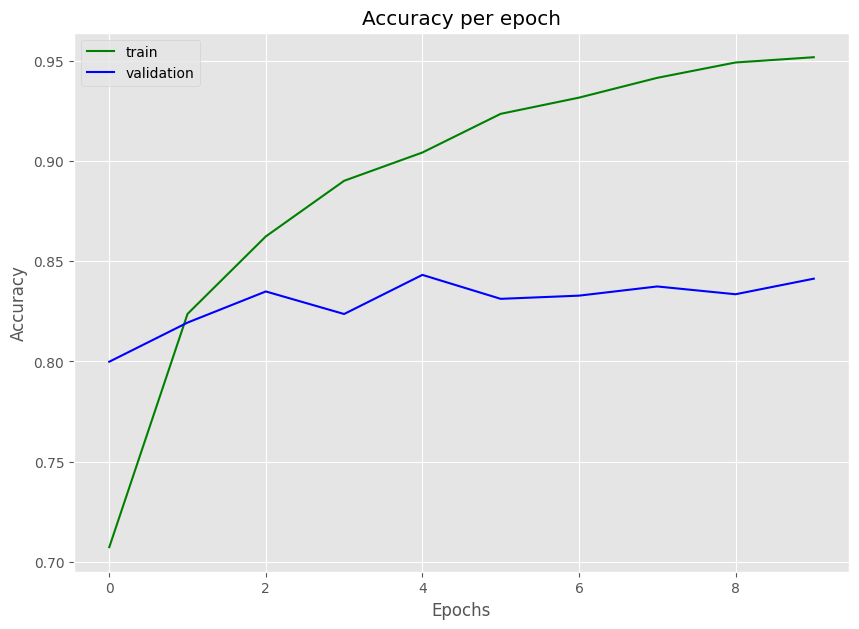

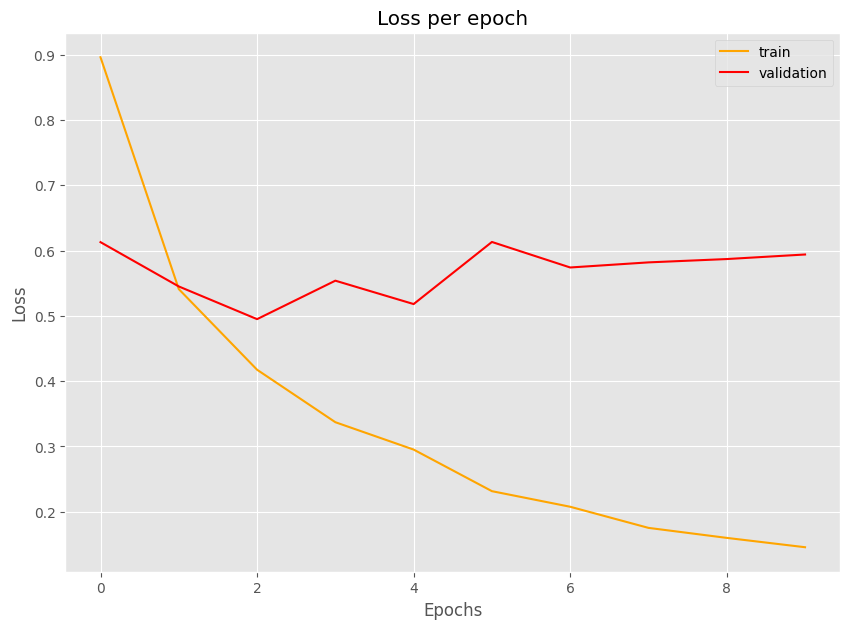

TRAINING FINISHED
CPU times: user 6min 4s, sys: 11.3 s, total: 6min 16s
Wall time: 8min 1s


In [ ]:
%%time
# Results when using resnet50 with pretrained weights
from train import train

results = train(num_classes=num_classes, model=model, model_name='resnet50_fine_tuned_pretrained_weights', batch_size=batch_size, num_workers=num_workers, epochs=epochs, max_lr=lr, loss_func=loss_func, optimizer=optimizer)


In [ ]:
!python test.py --num_classes 10 --cp_datetime '' --model_name 'resnet50_fine_tuned_pretrained_weights' --loss_func_name 'cross_entropy' --batch_size 64 --num_workers 2

# Train augmented models

In [ ]:
# Hyperparameters
num_classes = 10

num_workers = multiprocessing.cpu_count() if not torch.cuda.is_available() else 2
print(f'Number of workers: {num_workers}')

batch_size = 64

# Regularization
l2 = #L2 norm for weight regularization

# learning rate schedule - decrease the learning rate over a set period of epochs
init_lr = 0.001
gamma = 0.5
patience = 7 #7 epochs
epochs = 10
weight_decay = 0.09 #l2 weight decay

# Optimizer options:
optimizer = optim.Adam(model.parameters(), lr=lr)
#optimizer = optim.SGD(model.parameters(), lr=lr)